# All about curves

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import welly
welly.__version__

'0.4.2'

## Load a well from LAS

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well

In [3]:
w = Well.from_las('P-129_out.LAS')

In [4]:
w.data['GR']

Curve([46.69865036, 46.69865036, 46.69865036, ..., 92.24622345,
       92.24622345, 92.24622345])

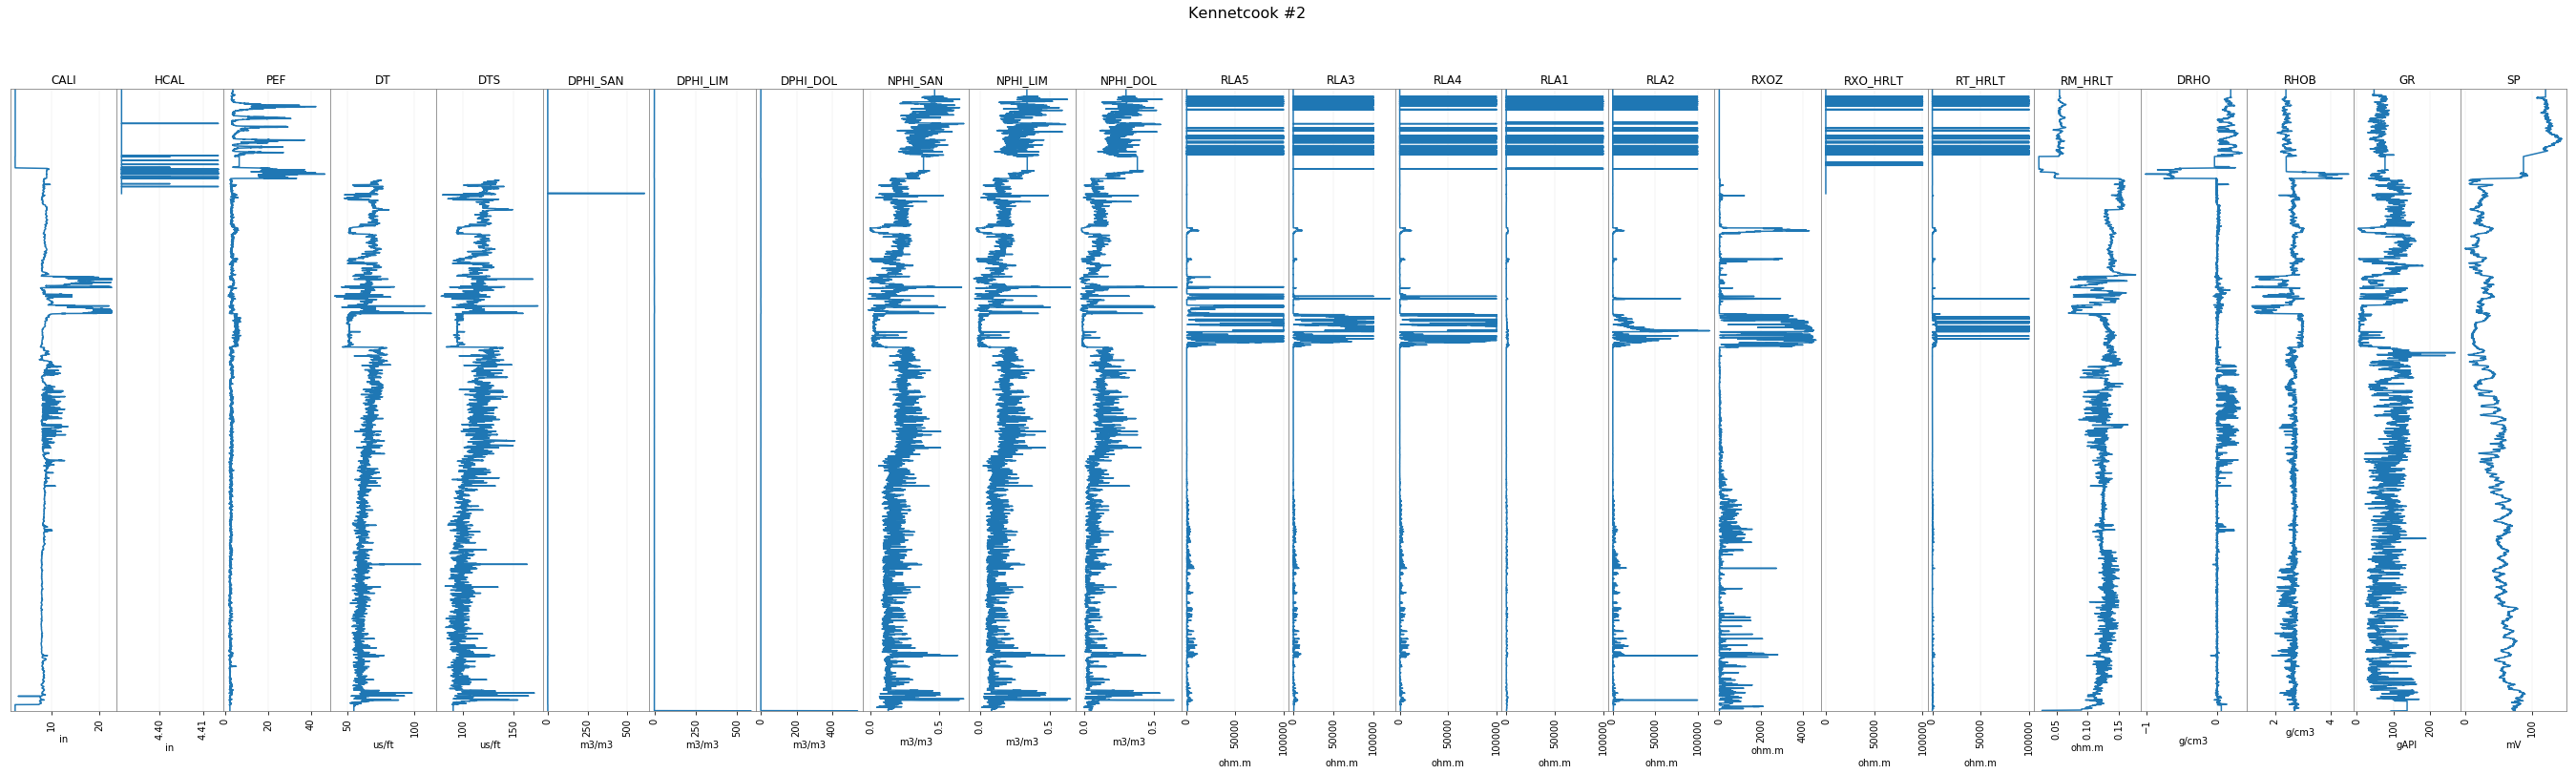

In [5]:
w.plot()

## Curves

Just a list of objects.

In [6]:
w.data  # Just a dict of data objects.

{'CALI': Curve([2.44381547, 2.44381547, 2.44381547, ..., 2.42026806, 2.42026806,
        2.42026806]),
 'HCAL': Curve([4.39128494, 4.39128494, 4.39128494, ...,        nan,        nan,
               nan]),
 'PEF': Curve([3.58640003, 3.58640003, 3.58640003, ..., 2.23697996, 2.23697996,
        2.23697996]),
 'DT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DTS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DPHI_SAN': Curve([0.15748   , 0.15748   , 0.15748   , ..., 0.54641998, 0.54641998,
        0.54641998]),
 'DPHI_LIM': Curve([1.98440000e-01, 1.98440000e-01, 1.98440000e-01, ...,
        5.85941528e+02, 5.85941528e+02, 5.85941528e+02]),
 'DPHI_DOL': Curve([2.5909999e-01, 2.5909999e-01, 2.5909999e-01, ..., 5.4167572e+02,
        5.4167572e+02, 5.4167572e+02]),
 'NPHI_SAN': Curve([0.46509999, 0.46509999, 0.46509999, ..., 0.12834001, 0.12834001,
        0.12834001]),
 'NPHI_LIM': Curve([0.33647001, 0.33647001, 0.33647001, ..., 0.08417   , 0.08417   ,
        0.08417   ]),
 'NPHI_DOL':

## Instantiating a new curve

In [7]:
from welly import Curve

In [8]:
p = {'mnemonic': 'FOO', 'run':0, }
data = [20, 30, 40, 20, 10, 0, 10]
c = Curve(data, basis=[2,3,4,5,6,7,8], params=p)

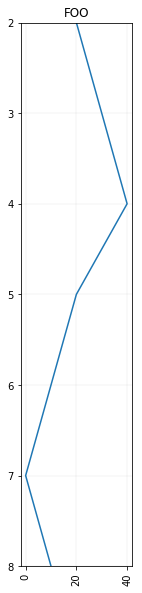

In [9]:
c.plot()

## Curve info

In Jupyter Notebook, the `__repr__()` is a little table summarizing the curve data...

In [10]:
gr = w.data['GR']
gr

Curve([46.69865036, 46.69865036, 46.69865036, ..., 92.24622345,
       92.24622345, 92.24622345])

In [11]:
gr.read_at(168.7068)

72.29363250700216

In [14]:
gr.basis

array([1.0668000e+00, 1.2192000e+00, 1.3716000e+00, ..., 1.9388328e+03,
       1.9389852e+03, 1.9391376e+03])

In [15]:
gr[1000:1010]

Curve([49.62210846, 52.28580093, 53.6212616 , 52.26504898, 52.87957001,
       51.68655014, 49.5466919 , 42.8824501 , 38.51496887, 36.18767929])

`Curve` objects are just `ndarray`s, so we get lots of things for free...

In [12]:
gr.describe()  # Equivalent to get_stats()

{'samples': 12718,
 'nulls': 0,
 'mean': 78.9863535887685,
 'min': 3.89406991,
 'max': 267.94042969}

In [18]:
gr.get_stats()

{'samples': 12718,
 'nulls': 0,
 'mean': 78.9863535887685,
 'min': 3.89406991,
 'max': 267.94042969}

In [13]:
m = np.mean(gr)

In [15]:
m  # Not really sure why this is a Curve

Curve(78.98635359)

In [16]:
gr.mnemonic

'GR'

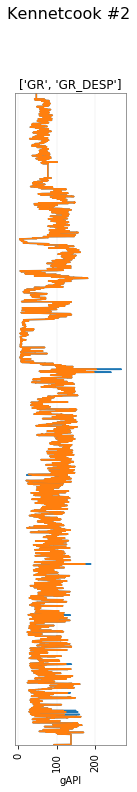

In [17]:
w.data['GR_DESP'] = gr.despike(window_length=50, z=2)
w.plot(tracks = [['GR', 'GR_DESP']])

## Slicing

It's usually better to get a subset of the data with `to_basis()` (see below, _Getting a segment of the data_). But you can slice with indices too:

In [18]:
gr.start, gr.stop

(1.0668, 1939.1376000000012)

In [19]:
g = gr[1000:1020]

In [20]:
g.basis

array([153.4668, 153.6192, 153.7716, 153.924 , 154.0764, 154.2288,
       154.3812, 154.5336, 154.686 , 154.8384, 154.9908, 155.1432,
       155.2956, 155.448 , 155.6004, 155.7528, 155.9052, 156.0576,
       156.21  , 156.3624])

Notice that the basis is updated to match the data retrieved by the slice.

## Plotting and reading

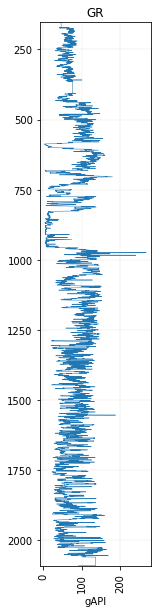

In [21]:
gr.plot(lw=0.5)

There's also an experimental 'imshow'-style 2D plot.

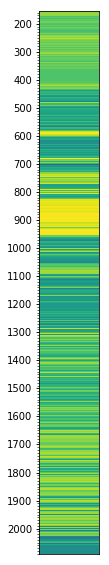

In [22]:
gr.plot_2d(cmap='viridis_r')

(0, 200)

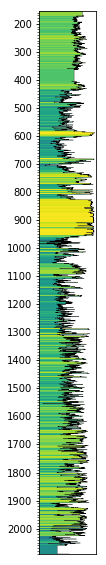

In [23]:
(200-gr).plot_2d(cmap='viridis', curve=True, lw=0.3, edgecolor='k')
plt.xlim(0,200)

## Interpolated values

You can get values from anywhere on the log:

In [24]:
gr.step

0.1524000000000001

In [25]:
gr.read_at(1001)

71.05545630648585

In [26]:
gr.read_at([1001, 1003, 1004])

array([71.05545631, 43.21758001, 59.86768433])

## Despike

You can despike with a window length for the trend and a Z-score to clip at — the curve is compared to the median *in the window* using the standard deviation *from the entire curve*. Here's the difference:

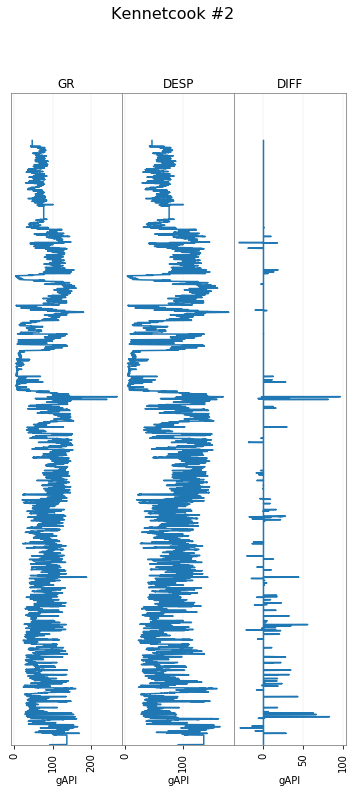

In [27]:
w.data['DESP'] = gr.despike(z=1)
w.data['DIFF'] = gr - w.data['DESP']
w.plot(tracks=['GR', 'DESP', 'DIFF'])

## Changing basis

You can easily upscale a bit by changing the step:

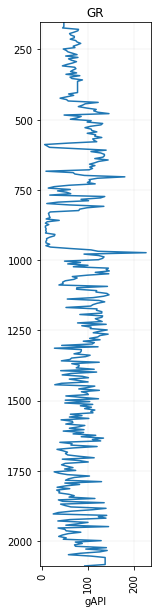

In [28]:
gr.to_basis(step=5).plot()

Or take out a segment of the log:

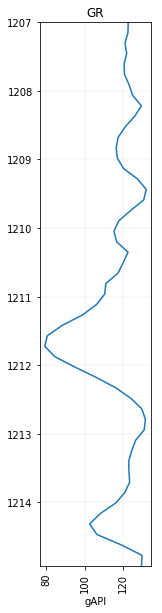

In [45]:
newb = gr.to_basis(start=1207, stop=1215)
newb.plot()

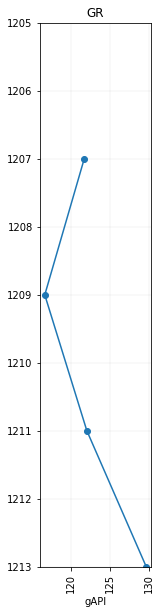

In [47]:
silly = newb.to_basis(start=1205, step=2)
silly.plot(marker='o')

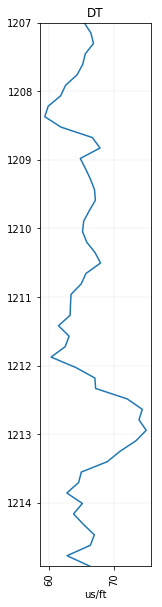

In [48]:
dt = w.data['DT']
dt.to_basis_like(newb.basis).plot()

## Getting a segment of the data

In [49]:
segment = gr.to_basis(start=600, stop=680)

In [50]:
segment.basis[-1]

679.8576

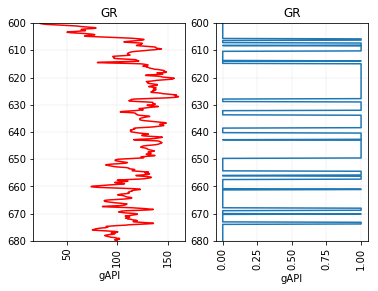

In [64]:
fig, axs = plt.subplots(ncols=2)

segment.plot(ax=axs[0], c='r')
segment.block(cutoffs=120, values=(0, 1)).plot(ax=axs[1])

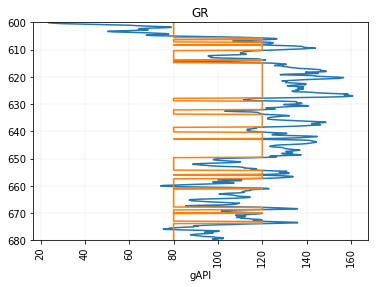

In [67]:
fig, ax = plt.subplots()

segment.plot(ax=ax)
segment.block(values=(80, 120)).plot(ax=ax)

You can use a cutoff of, say, 120 API, then reassign the output values to whatever you like:

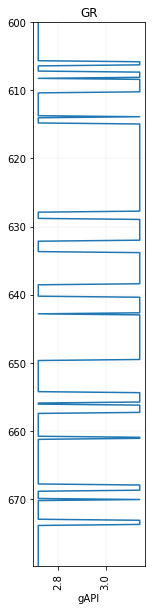

In [69]:
segment.block(cutoffs=120, values=(2.718, 3.142)).plot()

You can send a function in to determine replacement values from the original log. E.g., to replace the values with the block means:

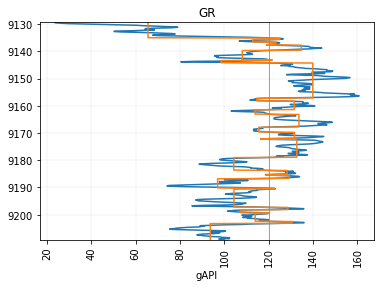

In [77]:
fig, ax = plt.subplots()

segment.plot(ax=ax)
segment.block(cutoffs=120, function=np.mean).plot(ax=ax)
plt.axvline(120, color='c', lw=0.75)